<a href="https://colab.research.google.com/github/andrepinotti/ICDS6-2024/blob/main/EngPrompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Construir uma aplicação (notebook Colab) de gerador de
códigos (uma função) com o MAMBA CODESTRAl
(MISTRAL) de IA que gere um código em linguagem C. Não consegui fazer o uso *dessa* ia mesmo com o token de acesso, o erro persistia em tópicos de autorização. Portanto, criei um código que possui uma função gerar_codigo_c que cria um esqueleto de código C, onde é necessário passarmos os parâmetros e assim gerar os resultados definidos nos scripts em C que criamos  

In [11]:
def gerar_codigo_c(nome_funcao, tipo_retorno, parametros, corpo_funcao):
  """
  Gera um código em linguagem C.

  Args:
    nome_funcao: Nome da função.
    tipo_retorno: Tipo de retorno da função.
    parametros: Lista de parâmetros da função (cada parâmetro é uma string
                no formato "tipo nome").
    corpo_funcao: O corpo da função (bloco de código C).

  Returns:
    Uma string contendo o código C gerado.
  """

  codigo_c = f"""
#include <stdio.h>

{tipo_retorno} {nome_funcao}({', '.join(parametros)}) {{
  {corpo_funcao}
}}

int main() {{
  // Exemplo de uso da função
  printf("{nome_funcao}(5, 2) = %d\\n", {nome_funcao}(5, 2));
  return 0;
}}
"""
  return codigo_c


# Exemplo de uso:
nome_da_funcao = "somar"
tipo_de_retorno = "int"
parametros_da_funcao = ["int a", "int b"]
corpo_da_funcao = """
  int soma = a + b;
  return soma;
"""

codigo_gerado = gerar_codigo_c(nome_da_funcao, tipo_de_retorno, parametros_da_funcao, corpo_da_funcao)
print(codigo_gerado)

# Para salvar o código em um arquivo:
with open("codigo_gerado.c", "w") as arquivo:
  arquivo.write(codigo_gerado)

# Para compilar e executar o código (linux/macOS):
!gcc codigo_gerado.c -o codigo_gerado
!./codigo_gerado


#include <stdio.h>

int somar(int a, int b) {
  
  int soma = a + b;
  return soma;

}

int main() {
  // Exemplo de uso da função
  printf("somar(5, 2) = %d\n", somar(5, 2));
  return 0;
}

somar(5, 2) = 7


2 - Transcrever os dados de uma imagem

In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract
!pip install Pillow


Código bem simples que possibilita pegarmos uma imagem de nossa escolha e transcrevê-la. No meu caso, peguei uma imagem de recibo comum da internet.

In [15]:
from PIL import Image
import pytesseract

# Carregar a imagem do recibo
image_path = "modelo-gerador-de-recibo.jpg"  # Substitua pelo caminho da sua imagem
image = Image.open(image_path)

# Usar o pytesseract para extrair o texto da imagem
text = pytesseract.image_to_string(image)

# Exibir o texto extraído
print(text)

 

| RECIBO VALOR: RS 1580.50

 

 

Eu, JOAO FRANCISCO MENDES ROCHA AZEVEDO, Portador(a) do RG n°
41.111.111-1 , CPF n® 222.222.222-22, Declaro ter recebido nesta data a quantia de: R$
1.530,50 (UM MIL E QUINHENTOS E TRINTAREAIS E CINQUENTA CENTAVOS.) de
MARIA FRANCISCA MENDES ROCHA AZEVEDO , Portador(a) do RG n° 33.333.333-3 , CPF
n? 444.444.444-44 , REFERENTE AO PAGAMENTO DO ALUGUEL DO MES DE MAIO DE
2018.

E para maior clareza, afirmo o presente.

So Paulo, 04 de Maio de 2018.

JOAO FRANCISCO MENDES ROCHA AZEVEDO

 



3 - Transcrever dados vindos de gráficos

In [ ]:
!pip install pytesseract opencv-python-headless matplotlib numpy


Iremos fazer uma detectação básica em uma imagem de gráfico que escolhi, ela vai nos retornar textos, contornos e bordas detectadas

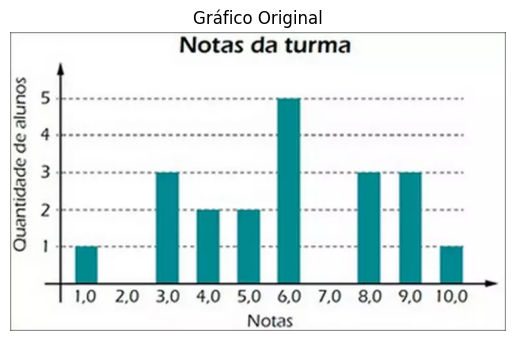

Texto extraído do gráfico:
 

Quantidade de alunos

 

Notas da turma

 

10 2,0 3,0 4,0 5,0 60 7,0 80 9,0 10,0

Notas

 

 



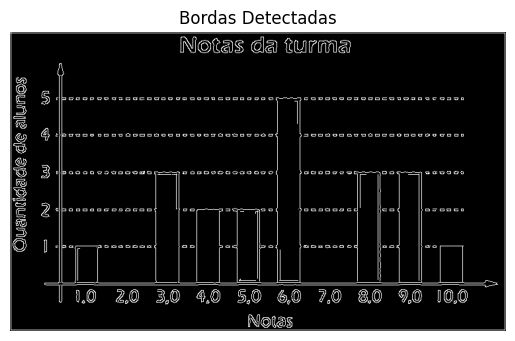

Número de contornos detectados: 615


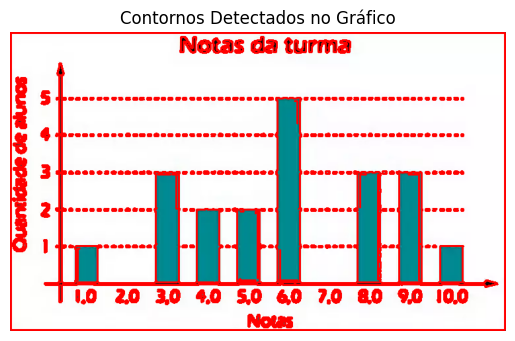

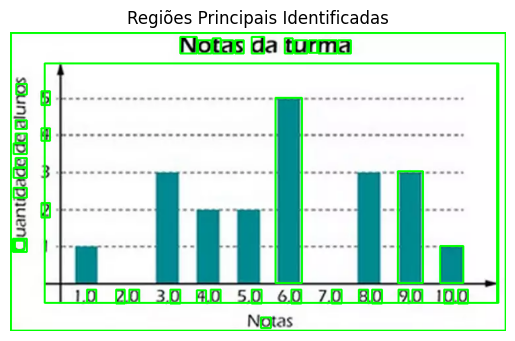

In [20]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Carregar a imagem do gráfico
caminho = "grafico-de-colunas-mais-bolsas.webp"
imagem = cv2.imread(caminho)

# Converter para RGB para visualização
image_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Exibir a imagem original
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Gráfico Original")
plt.show()

# Extraindo texto com OCR para capturar rótulos e legendas
texto = pytesseract.image_to_string(image)
print("Texto extraído do gráfico:")
print(texto)

# Processamento de imagem: converter para escala de cinza
cinza = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar detecção de bordas para identificar os contornos dos elementos do gráfico
edges = cv2.Canny(cinza, threshold1=30, threshold2=100)

# Exibir as bordas detectadas
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.title("Bordas Detectadas")
plt.show()

# Encontra contornos para descrever cada parte do gráfico
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(f"Número de contornos detectados: {len(contours)}")

# Exibir os contornos no gráfico
img_contornada = image_rgb.copy()

# desenha os contornos detectados
cv2.drawContours(img_contornada, contours, -1, (255, 0, 0), 2)

plt.imshow(img_contornada)
plt.axis("off")
plt.title("Contornos Detectados no Gráfico")
plt.show()

# Analisar contornos e áreas para identificar as regiões principais
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Filtrando contornos pequenos
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Exibir as regiões principais no gráfico
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Regiões Principais Identificadas")
plt.show()

4- Geração de texto de uma temática com cadeia de
pensamento. Portanto, definiremos um tema juntamente como no nosso código colocaremos algumas cadeias de pensamentos




In [31]:
def generate_text_with_thought_chain(tema, numero_pensamentos=3):
    """
    Gera um texto baseado em uma temática com uma cadeia de pensamento.

    Args:
        tema: O tema para a geração do texto.
        num_pensamentos: O número de pensamentos a serem gerados na cadeia.

    Returns:
        Uma string contendo o texto gerado.
    """

    pensamentos = []
    pensamento_atual = tema

    # Pensamentos iniciais sobre o tema
    pensamentos_iniciais = [
        f"A relevância de {tema} em nossa sociedade atual.",
        f"Os impactos positivos e negativos de {tema}.",
        f"A evolução de {tema} ao longo dos anos."
    ]

    # Selecionamos pensamentos iniciais baseados no tema
    pensamentos.extend(pensamentos_iniciais[:numero_pensamentos])

    # Combinaremos os pensamentos para formar um texto final decente
    texto_final = f"Considerando o tema '{tema}', vamos explorar uma cadeia de pensamentos:\n\n"
    for i, pensamentos in enumerate(pensamentos, 1):
        texto_final += f"Pensamento {i}: {pensamentos}\n"

    return texto_final


# Exemplo de uso
tema = "Brasil e os desafios para a soberania nacional e industrialização"
texto_gerado = generate_text_with_thought_chain(tema, numero_pensamentos=3)
print(texto_gerado)

# Outro Exemplo
tema = "Preparação do Palmeiras para 2025"
texto_gerado = generate_text_with_thought_chain(tema, numero_pensamentos=5)
print(texto_gerado)

Considerando o tema 'Brasil e os desafios para a soberania nacional e industrialização', vamos explorar uma cadeia de pensamentos:

Pensamento 1: A relevância de Brasil e os desafios para a soberania nacional e industrialização em nossa sociedade atual.
Pensamento 2: Os impactos positivos e negativos de Brasil e os desafios para a soberania nacional e industrialização.
Pensamento 3: A evolução de Brasil e os desafios para a soberania nacional e industrialização ao longo dos anos.

Considerando o tema 'Preparação do Palmeiras para 2025', vamos explorar uma cadeia de pensamentos:

Pensamento 1: A relevância de Preparação do Palmeiras para 2025 em nossa sociedade atual.
Pensamento 2: Os impactos positivos e negativos de Preparação do Palmeiras para 2025.
Pensamento 3: A evolução de Preparação do Palmeiras para 2025 ao longo dos anos.

